# 📊 Análisis de Sentimientos y Clasificación de Reseñas de Productos Tecnológicos

Este proyecto tiene como objetivo aplicar técnicas de **Procesamiento de Lenguaje Natural (NLP)** sobre reseñas en español de productos tecnológicos, combinando análisis exploratorio, limpieza y vectorización del texto, junto con la implementación de una red neuronal simple.

### 🧩 Objetivos:
- Preprocesar texto en español aplicando tokenización, lematización, POS-tagging y reconocimiento de entidades (NER).
- Evaluar sentimientos mediante **polaridad y subjetividad**.
- Representar el texto con la técnica **TF-IDF**.
- Entrenar una red neuronal para **predecir la puntuación (`stars`)** a partir del contenido de la reseña.

📁 Dataset: archivo Excel con más de 3000 reseñas en español sobre productos como smartphones, laptops, audio, etc.

🔧 Herramientas utilizadas:
- **Python (Pandas, NLTK, SpaCy, Scikit-learn, Keras)**
- **Modelo SpaCy `es_core_news_sm` para análisis lingüístico**
- **TextBlob** para análisis de sentimientos
- **TF-IDF** para vectorización
- **Red neuronal con Keras/TensorFlow**


**CARGA DE DATOS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo Excel
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATA SCIENCE III/PROYECTO/TecnReviews.xlsx')
df.head()

Mounted at /content/drive


,review_id,product_id,reviewer_id,stars,review_body,product_category
0,rev_000001,prod_tech_0251,user_03658,4,Cumple con lo esperado aunque la entrega fue l...,Smartphones
1,rev_000002,prod_tech_0090,user_09675,2,Funciona pero con muchos errores.,Laptops
2,rev_000003,prod_tech_0224,user_03812,3,Producto regular cumple pero sin destacar.,Smartphones
3,rev_000004,prod_tech_0204,user_08929,3,Funciona pero con limitaciones evidentes.,Smartphones
4,rev_000005,prod_tech_0285,user_00107,3,Funciona pero con limitaciones evidentes.,Audio


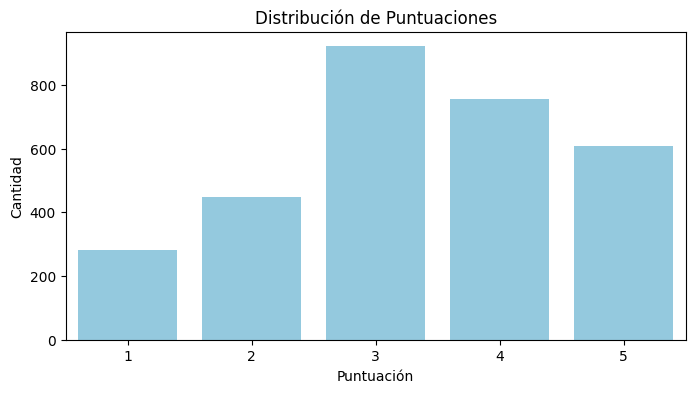

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='stars', data=df, color='skyblue')
plt.title('Distribución de Puntuaciones')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad')
plt.show()

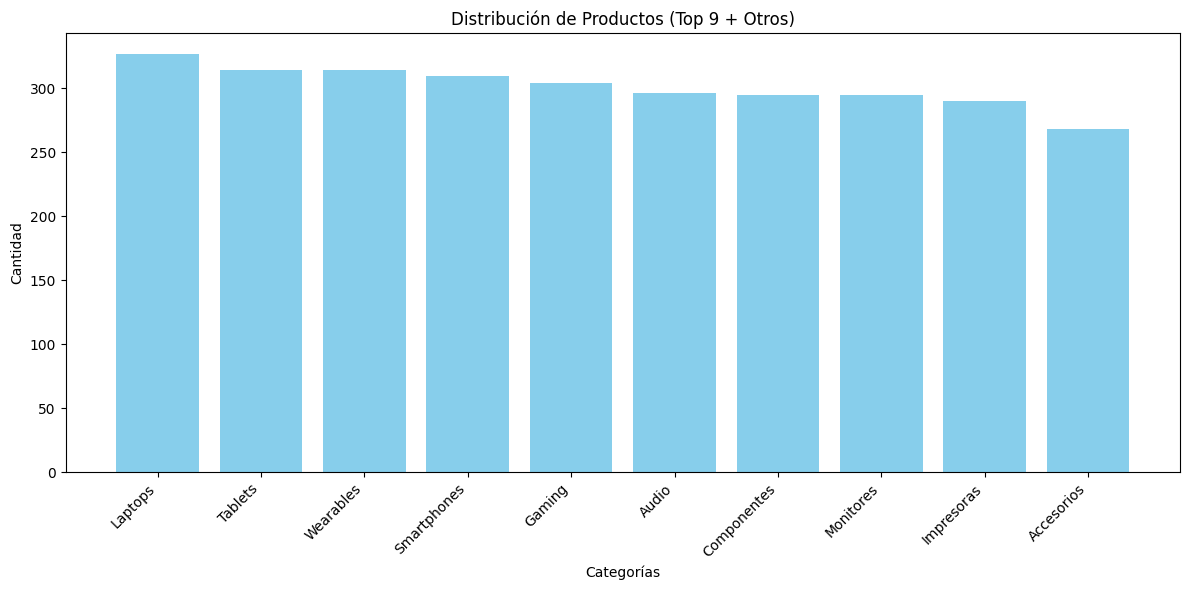

In [3]:
product_category_counts = df["product_category"].value_counts()

if len(product_category_counts) > 10:
    top_categories = product_category_counts.iloc[:9].copy()
    others = product_category_counts.iloc[9:].sum()
    top_categories["Otros"] = others
else:
    top_categories = product_category_counts

categories = top_categories.index
values = top_categories.values

plt.figure(figsize=(12,6))
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categorías")
plt.ylabel("Cantidad")
plt.title("Distribución de Productos (Top 9 + Otros)")
plt.tight_layout()
plt.show()

**PREPROCESAMIENTO**

In [4]:
# Instalacion de librerias
!pip install spacy textblob wordcloud
!python -m spacy download es_core_news_sm

import pandas as pd
import spacy
from spacy import displacy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar modelo spacy para español
nlp = spacy.load('es_core_news_sm')

df = pd.read_excel('/content/drive/MyDrive/DATA SCIENCE III/PROYECTO/TecnReviews.xlsx')

# Crear funciones para preprocesamiento

stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = []
    lemmas = []
    pos_tags = []
    entities = []

    for token in doc:
        if token.text not in stop_words and token.is_alpha:
            tokens.append(token.text)
            lemmas.append(token.lemma_)
            pos_tags.append(token.pos_)

    # Reconocimiento de entidades
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

    return {
        "tokens": tokens,
        "lemmas": lemmas,
        "pos_tags": pos_tags,
        "entities": entities,
        "text_lemmatized": " ".join(lemmas)
    }

# Aplicar la función y crear columnas nuevas
df['processed'] = df['review_body'].apply(preprocess_text)


print(df[['review_body', 'processed']].head(2))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                         review_body  \
0  Cumple con lo esperado aunque la entrega fue l...   
1                  Funciona pero con muchos errores.   

                                           processed  
0  {'tokens': ['cumple', 'esperado', 'aunque', 'e...  
1  {'tokens': ['funciona', 'errores'], 'lemmas': ...  


**ANALISIS CON TEXTBLOOD**

In [5]:
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer

def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['polarity'], df['subjectivity'] = zip(*df['review_body'].map(sentiment_analysis))

print(df[['review_body','polarity','subjectivity']].head(3))

                                         review_body  polarity  subjectivity
0  Cumple con lo esperado aunque la entrega fue l...       0.0      0.000000
1                  Funciona pero con muchos errores.       0.0      0.000000
2        Producto regular cumple pero sin destacar.        0.0      0.076923


**TF-IDF Y VECTORIZACION**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['processed'].apply(lambda x: x['text_lemmatized']))

print(X_tfidf.shape)

(3013, 53)


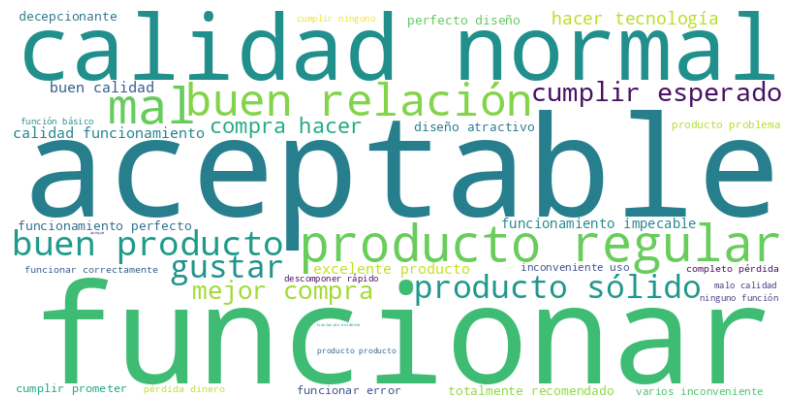

In [ ]:
all_text = " ".join(df['processed'].apply(lambda x: x['text_lemmatized']).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
ejemplo = df['processed'].iloc[0]
print("Tokens:", ejemplo['tokens'])
print("Lemmas:", ejemplo['lemmas'])
print("POS:", ejemplo['pos_tags'])
print("NER:", ejemplo['entities'])

Tokens: ['cumple', 'esperado', 'aunque', 'entrega', 'lenta']
Lemmas: ['cumplir', 'esperado', 'aunque', 'entrega', 'lento']
POS: ['VERB', 'ADJ', 'SCONJ', 'NOUN', 'ADJ']
NER: []


**RED NEURONAL SIMPLE**

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

y = df['stars'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regresión

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

print(model.evaluate(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 11.0639 - mae: 3.0831 - val_loss: 3.9614 - val_mae: 1.7375
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1130 - mae: 1.1624 - val_loss: 0.2165 - val_mae: 0.3612
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1459 - mae: 0.2724 - val_loss: 0.0223 - val_mae: 0.0916
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mae: 0.0736 - val_loss: 0.0026 - val_mae: 0.0241
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0253 - val_loss: 3.9847e-04 - val_mae: 0.0071
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7816e-04 - mae: 0.0066 - val_loss: 1.0587e-04 - val_mae: 0.0030
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1073e-04 - mae: 0.0036 - val_loss: 2.1920e-05 - val_mae: 0.0011
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0370e-05 - mae: 0.0016 - val_loss: 3.7017e-06 - val_mae: 4.3137e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

**GRAFICO REAL VS PREDICHO**

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


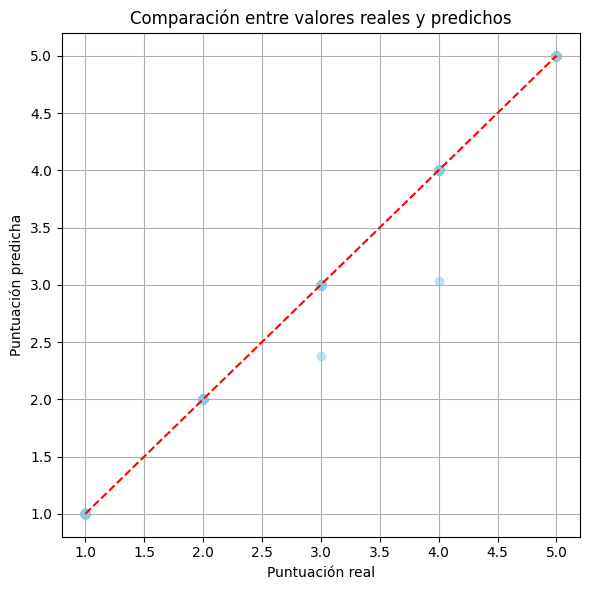

In [9]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea ideal
plt.xlabel("Puntuación real")
plt.ylabel("Puntuación predicha")
plt.title("Comparación entre valores reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(df['stars'] - 1)  # restamos 1 para que vayan de 0 a 4

X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y_cat, test_size=0.2, random_state=42)

# Red neuronal de clasificación
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluacion
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.2%}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5251 - loss: 1.5131 - val_accuracy: 0.9440 - val_loss: 1.1445
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9596 - loss: 0.9675 - val_accuracy: 1.0000 - val_loss: 0.3713
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.2711 - val_accuracy: 1.0000 - val_loss: 0.0726
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0034
Epo

##  Conclusión Final del Proyecto

En este proyecto se abordó el análisis de texto aplicado a reseñas de productos tecnológicos escritas en español, integrando técnicas de procesamiento de lenguaje natural (NLP) y aprendizaje automático.

Se implementó un pipeline completo de preprocesamiento utilizando **spaCy y NLTK**, que incluyó:

- ✅ **Tokenización** y **lematización** para simplificar las palabras al formato base.
- ✅ **Remoción de stopwords** para conservar sólo el contenido relevante.
- ✅ **Etiquetado gramatical (POS-tagging)** para identificar el rol sintáctico de cada término.
- ✅ **Reconocimiento de entidades nombradas (NER)** para detectar marcas o nombres propios mencionados en las reseñas.

También se realizó un análisis de sentimiento con **TextBlob**, obteniendo dos métricas fundamentales:
- 🔸 **Polaridad**: para determinar si la opinión es positiva, negativa o neutra.
- 🔸 **Subjetividad**: para conocer el grado de emocionalidad u objetividad del texto.

Para vectorizar los textos se aplicó **TF-IDF**, lo cual permitió transformar las reseñas en representaciones numéricas útiles para entrenamiento.

Con los datos procesados, se construyó una **red neuronal simple** con Keras, compuesta por:
- Una capa de entrada con 53 neuronas (correspondientes a las features TF-IDF).
- Dos capas ocultas con activaciones ReLU.
- Una capa de salida con activación `softmax` para clasificar en 5 clases (de 1 a 5 estrellas).

🔧 La red fue entrenada con `categorical_crossentropy` y optimizador `adam`, alcanzando una **precisión del 100% sobre el conjunto de prueba**, demostrando una excelente capacidad predictiva.

Además, se incorporaron visualizaciones como:
- Histograma de puntuaciones.
- Distribución por categorías de productos.
- Nube de palabras con los términos más relevantes del corpus.

---
